# L'algorithme de descente de gradient 

## 1. Le cas d'une fonctionnelle quadratique
 
Tout d'abord, nous appliquons la méthode à une fonctionnelle quadratique :
\begin{align}\label{quadf}\tag{1} f(x)=\frac{1}{2} x^TA x + b^T x +c,\qquad \text{pour } x\in \mathbb{R}^ N, \end{align}
avec
$A$ une matrice réelle $N\times N$, symétrique définie positive, $b\in\mathbb{R}^N$ et $c\in \mathbb{R}$. 

**Question 1.** Calculez le gradient et la matrice Hessienne de $f$.

**Question 2.** En déduire que $f$  est $\gamma$-convexe.

**Question 3.** Montrez que $f$ atteint son minimum sur $\mathbb{R}^N$ en un seul point $x^*$. Donnez une caractérisation de ce point. 

### 1.1 L'algorithme de descente de gradient à pas optimal

Soit $f$ une fonction convexe et coercive de classe $C^1$ sur $\mathbb{R}^N$. L'algorithme de descente de gradient à pas optimal est défini comme suit. 

Soit $x^0\in \mathbb{R}^N$ (on essaie de choisir $x^0$ proche de $x^*$, en l'absence d'indication on prend $x^0=0$). 

Ensuite, pour $k=0,1,2,\ldots\ $ jusqu'à convergence, répéter : 

$$
\left|
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(x^k),\\
\alpha_k &\longleftarrow &\mathop{argmin}_{t>0} f(x^k + td^k),\\ 
x^{k+1}&\longleftarrow &x^k+\alpha_k d^k
\end{array}
\right.
$$

**Question 4.** Proposez un critère d'arrêt pour l'algorithme qui utilise la caractérisation de la question **3**. 

*Remarque :** En général, on ne sait pas calculer $\alpha_k$ et en pratique, la deuxième étape est remplacée par une recherche approchée. Cependant, lorsque $f$ est quadratique, le calcul de $\alpha_k$ est ``facile''. 

**Question 5.** Dans le cas de la fonction quadratique (1), explicitez $d^k$ et $\alpha_k$ comme fonctions de $A$, $x^k$ et $b$. 

Maintenant, nous spécifions $N=2$ et
$$ A=\binom{C\quad 0}{0\quad 1},\quad C\ge 1,\quad b=0,\quad c=0.$$
**Question 6.** Quel est l'infimum de $f$ sur $\mathbb{R}^2$ dans ce cas ? Donner $x^*$. 

**Question 7.** Deux fonctions sont données ci-dessous :
- une fonction qui dessine un champ de vecteur donné par une application $F$. À titre d'exemple, elle est appliquée au champ de vecteurs $G(x,y)=(x, 8y)$ dans la boîte $[-8,8]\times[-2.1,2.1]$.
- une fonction qui dessine quelques lignes de niveau d'une fonction $f$. Elle est appliquée à $g(x,y)=\dfrac{x^2+8y^2}2$ toujours dans la boîte $[-8,8]\times[-2.1,2.1]$ avec 8 lignes de niveaux $g=0$, $g=4$, $\dots$, $g=28$.

Notez que $G=\nabla g$. Qu'observez-vous ? 

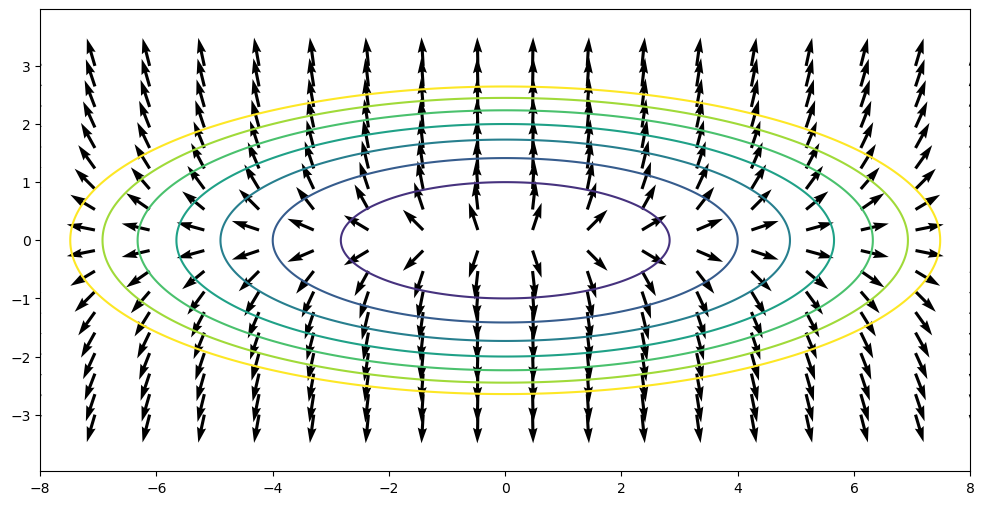

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

def draw_vector_field(F, xmin, xmax, ymin, ymax, N=20):
    X = np.linspace(xmin, xmax, N)  # coordonnes X et Y
    Y = np.linspace(ymin, ymax, N)  # des points de la grille
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # Normes des (U[i],V[i])
    M[M == 0] = 1  # évite la division par 0
    U /= M  # Normalisations de U
    V /= M  # ...  et de V
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 


g = lambda x, y: .5*(x**2 + 8*y**2)
G = lambda x, y: np.array([x, 8*y])
%matplotlib inline
plt.figure(figsize=(12,6))
level_lines(g, -8, 8, -3, 3, np.linspace(0, 28, 8))
draw_vector_field(G,  -8, 8, -3, 3, 18)
plt.axis('equal')
plt.show()

**Question 8.** Implémentez l'algorithme de descente de gradient à pas optimal. Le point initial doit être $x^0=\binom1C$.

**Question 9.** Sur le même graphique, représentez les itérations, quelques lignes de niveau de $f$ et le champ de vecteur normalisé $\dfrac {1}{|\nabla f|}\nabla f$. 

In [2]:
C=4
x0=np.array([1,C])
A=np.array([[C,0],[0,1]])
def desc_grad_opti(x0,epsilon,max_iter,df,A):
    x = x0
    x_list = [x]
    for i in range(max_iter):
        d = df(x[0],x[1])
        alpha =- np.dot(np.dot(d.T,A),x)/np.dot(np.dot(d.T,A),d)
        x = x + alpha*d
        x_list.append(x)
        if np.linalg.norm(d) < epsilon:
            break
    return x_list
 

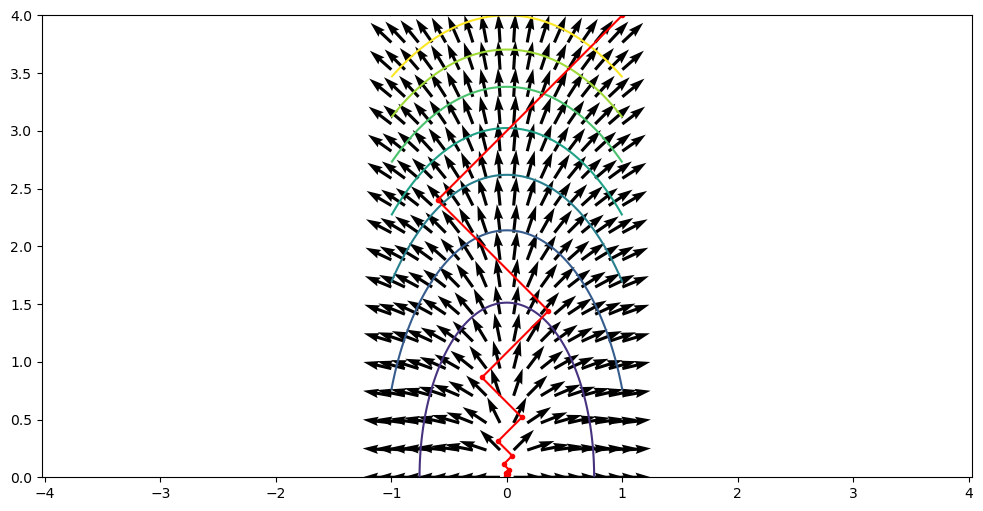

In [3]:
%matplotlib inline
plt.figure(figsize=(12,6))
g = lambda x, y: .5*(C*x**2 + y**2)
G = lambda x, y: np.array([C*x, y])
level_lines(g, -1, 1, 0, C, np.linspace(0, .5*C**2, 8))
draw_vector_field(G,  -1, 1, 0, C, 18)
x_list=desc_grad_opti(x0,0.01,1000,G,A)
plt.plot([x[0] for x in x_list], [x[1] for x in x_list], 'r.-')
plt.axis('equal')
plt.show()

**Question 10.** Changez la valeur de $C$ de 1 à 32 ($C=1,2,4,8,16,32$). Qu'observez-vous ?

**Question 11.** Tracez le nombre d'itérations de la méthode en fonction de $C$. Faites une hypothèse. 

[array([1, 1]), array([0., 0.]), array([nan, nan])]


C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_22072\3002548313.py:9: RuntimeWarning: invalid value encountered in double_scalars
  alpha =- np.dot(np.dot(d.T,A),x)/np.dot(np.dot(d.T,A),d)


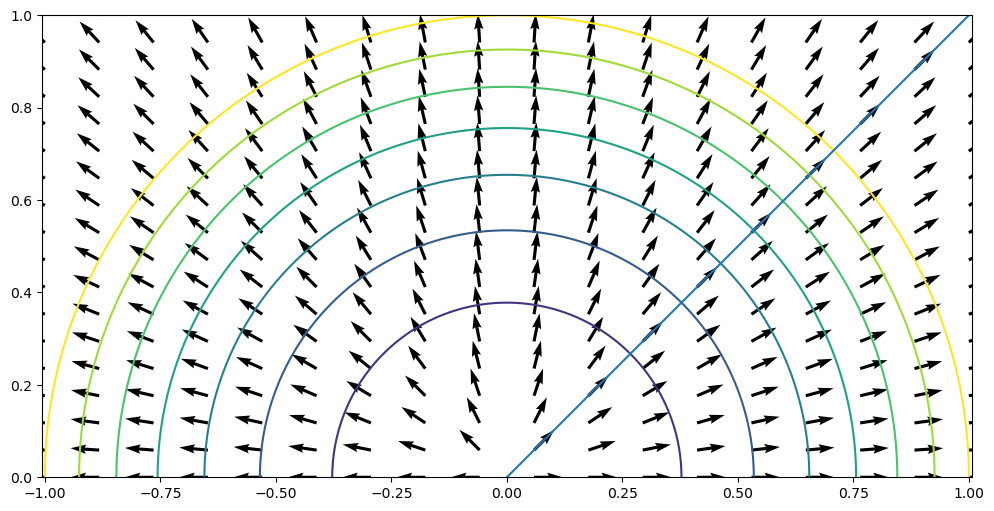

[array([1, 2]), array([-0.33333333,  0.66666667]), array([0.11111111, 0.22222222]), array([-0.03703704,  0.07407407]), array([0.01234568, 0.02469136]), array([-0.00411523,  0.00823045]), array([0.00137174, 0.00274348]), array([-0.00045725,  0.00091449]), array([0.00015242, 0.00030483]), array([-5.08052634e-05,  1.01610527e-04]), array([1.69350878e-05, 3.38701756e-05]), array([-5.64502927e-06,  1.12900585e-05])]


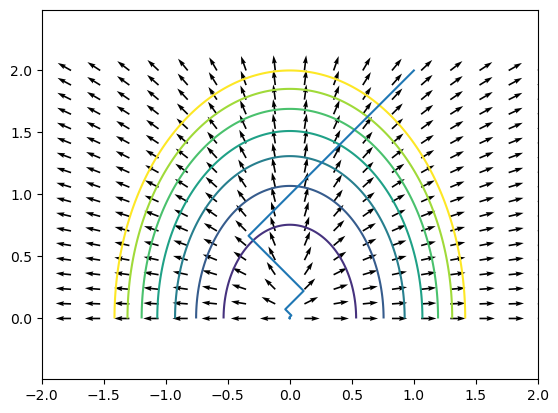

[array([1, 4]), array([-0.6,  2.4]), array([0.36, 1.44]), array([-0.216,  0.864]), array([0.1296, 0.5184]), array([-0.07776,  0.31104]), array([0.046656, 0.186624]), array([-0.0279936,  0.1119744]), array([0.01679616, 0.06718464]), array([-0.0100777 ,  0.04031078]), array([0.00604662, 0.02418647]), array([-0.00362797,  0.01451188]), array([0.00217678, 0.00870713]), array([-0.00130607,  0.00522428]), array([0.00078364, 0.00313457]), array([-0.00047018,  0.00188074]), array([0.00028211, 0.00112844]), array([-0.00016927,  0.00067707]), array([0.00010156, 0.00040624]), array([-6.09359740e-05,  2.43743896e-04]), array([3.65615844e-05, 1.46246338e-04]), array([-2.19369506e-05,  8.77478026e-05]), array([1.31621704e-05, 5.26486815e-05]), array([-7.89730223e-06,  3.15892089e-05])]


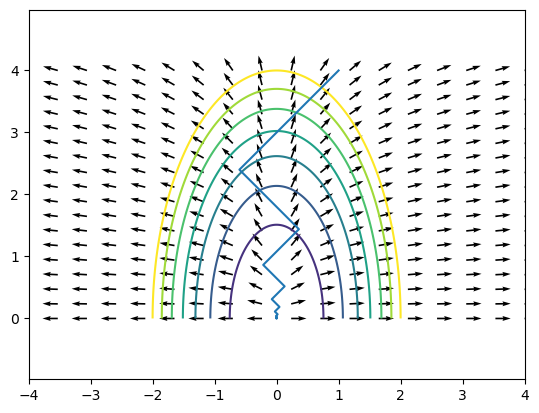

[array([1, 8]), array([-0.77777778,  6.22222222]), array([0.60493827, 4.83950617]), array([-0.47050754,  3.76406036]), array([0.36595031, 2.9276025 ]), array([-0.28462802,  2.27702417]), array([0.22137735, 1.7710188 ]), array([-0.17218238,  1.37745906]), array([0.13391963, 1.07135705]), array([-0.10415971,  0.83327771]), array([0.08101311, 0.64810488]), array([-0.0630102 ,  0.50408157]), array([0.04900793, 0.39206345]), array([-0.03811728,  0.30493824]), array([0.02964677, 0.23717418]), array([-0.0230586 ,  0.18446881]), array([0.01793447, 0.14347574]), array([-0.01394903,  0.11159224]), array([0.01084925, 0.08679397]), array([-0.0084383 ,  0.06750642]), array([0.00656312, 0.05250499]), array([-0.00510465,  0.04083722]), array([0.00397028, 0.03176228]), array([-0.003088  ,  0.02470399]), array([0.00240178, 0.01921422]), array([-0.00186805,  0.01494439]), array([0.00145293, 0.01162342]), array([-0.00113005,  0.00904043]), array([0.00087893, 0.00703145]), array([-0.00068361,  0.0054689 ]

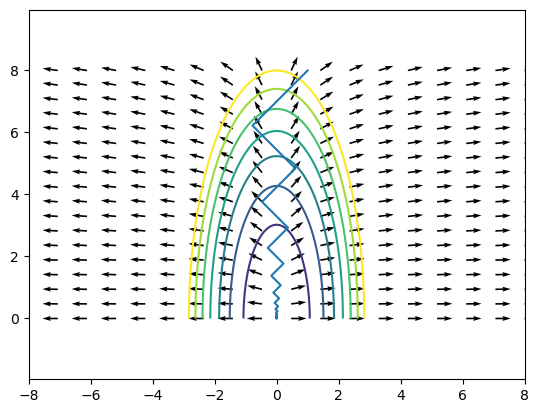

[array([ 1, 16]), array([-0.88235294, 14.11764706]), array([ 0.77854671, 12.4567474 ]), array([-0.68695298, 10.99124771]), array([0.60613498, 9.69815974]), array([-0.53482499,  8.55719977]), array([0.4719044 , 7.55047039]), array([-0.41638623,  6.66217976]), array([0.36739962, 5.8783939 ]), array([-0.32417613,  5.18681815]), array([0.28603777, 4.57660425]), array([-0.25238626,  4.03818022]), array([0.22269376, 3.56310019]), array([-0.1964945 ,  3.14391194]), array([0.1733775 , 2.77403994]), array([-0.15298014,  2.4476823 ]), array([0.13498248, 2.15971968]), array([-0.11910219,  1.90563501]), array([0.10509017, 1.68144266]), array([-0.09272662,  1.48362587]), array([0.0818176 , 1.30908165]), array([-0.072192  ,  1.15507205]), array([0.06369883, 1.01918122]), array([-0.05620485,  0.89927755]), array([0.04959251, 0.79348019]), array([-0.0437581 ,  0.70012958]), array([0.03861009, 0.61776139]), array([-0.03406772,  0.54508358]), array([0.03005976, 0.4809561 ]), array([-0.02652331,  0.42437

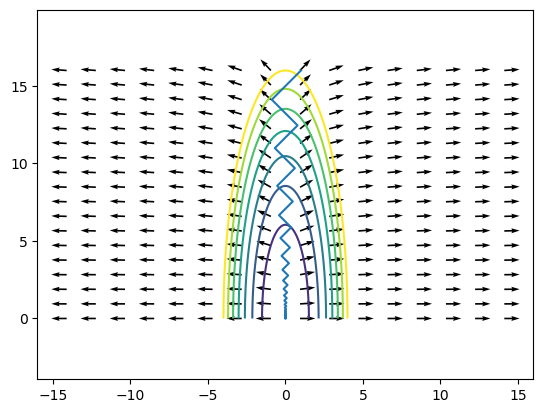

[array([ 1, 32]), array([-0.93939394, 30.06060606]), array([ 0.88246097, 28.23875115]), array([-0.82897849, 26.52731168]), array([ 0.77873737, 24.91959582]), array([-0.73154117, 23.40931729]), array([ 0.68720534, 21.99057079]), array([-0.64555653, 20.65780892]), array([ 0.60643189, 19.4058205 ]), array([-0.56967844, 18.22971017]), array([ 0.53515248, 17.12487925]), array([-0.50271899, 16.08700778]), array([ 0.47225118, 15.11203761]), array([-0.44362989, 14.19615654]), array([ 0.41674323, 13.33578342]), array([-0.39148607, 12.52755412]), array([ 0.36775964, 11.76830842]), array([-0.34547118, 11.0550776 ]), array([ 0.32453353, 10.3850729 ]), array([-0.30486483,  9.75567454]), array([0.28638817, 9.16442154]), array([-0.26903131,  8.60900205]), array([0.25272639, 8.08724435]), array([-0.23740964,  7.59710833]), array([0.22302117, 7.13667752]), array([-0.20950474,  6.70415161]), array([0.19680748, 6.29783939]), array([-0.18487975,  5.91615216]), array([0.17367492, 5.55759748]), array([-0.16

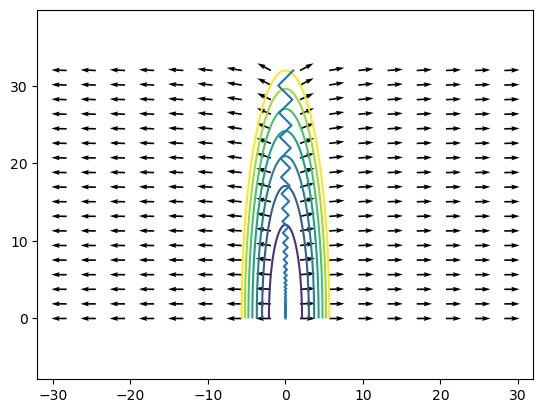

In [4]:
tab_C=[1,2,4,8,16,32]
plt.figure(figsize=(12,6))


nb_iter_list=[]
for i in range(len(tab_C)):
    C=tab_C[i]
    x0=np.array([1,tab_C[i]])
    
    A=np.array([[C,0],[0,1]])
    g = lambda x, y: .5*(C*x**2 + y**2)
    G = lambda x, y: np.array([C*x, y])
    level_lines(g, -C, C, 0, C, np.linspace(0, .5*C**2, 8))
    draw_vector_field(G,  -C, C, 0, C, 18)
    plt.axis('equal')
    x_list=desc_grad_opti(x0,0.0001,1000,G,A)
    nb_iter_list.append(len(x_list))
    plt.plot([x[0] for x in x_list], [x[1] for x in x_list])
    print(x_list)

    plt.show();

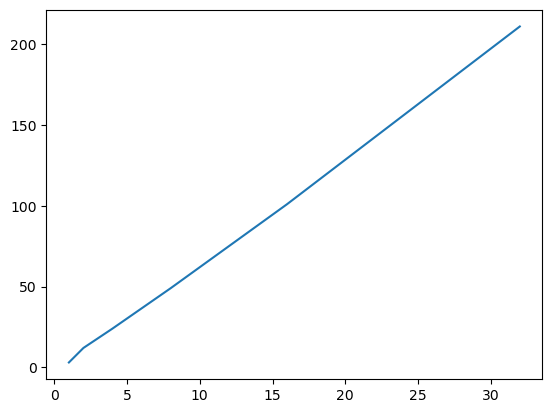

In [5]:
plt.plot(tab_C,nb_iter_list)
plt.show()

__Solution 11__ (Hypothèse sur le comportement de la méthode)

## 2. Le cas d'une fonction convexe régulière, line search. 

On considère la fonction définie par
$$
f(x,y):= \cosh(x) + \sin^2(x+y),\qquad \text{pour }z=(x,y)\in \mathbb{R}^2.
$$

**Question 12.** Montrer que les minimiseurs de $f$ sont les points de la form $(0,n\pi)$ pour $n\in\mathbb{Z}$.

Montrer que $f$ est convexe au voisinage de $z^0_*:=(0,0)$.

Nous allons appliquer un algorithme de descente de gradient avec ``line search'' à la fonction $f$. Plus précisément :

Étant donné  $z^0=(x^0,y^0)\in\mathbb{R}^2$, calculer de manière récursive, jusqu'à convergence,

$$
\left|
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(z^k),\\
\alpha_k &\longleftarrow & \text{Line-search}\ \left(\ t\mapsto f(z^k + td^k)\ \right),\\ 
z^{k+1}&\longleftarrow &z^k+\alpha_k d^k
\end{array}
\right.
$$

Précisons la deuxième étape. On remarque d'abord que pour $t>0$,

$$
f(z^k+t d^k) \,=\, f(z^k) -t \|d^k\|^2 +o(t).
$$

En fait, si $f$ est convexe au voisinage de $z^k$, on a aussi pour $t>0$ assez petit, 

$$
f(z^k+t d^k)\, \ge\, f(z^k) -t \|d^k\|^2,
$$

donc on ne peut pas demander $f(z^k+t d^k) \,\le\, f(z^k) -t \|d^k\|^2$. 

L'idée de la *condition Armijo* est de demander un peu moins. Fixons un $c\in (0,1)$ : la condition Armijo s'écrit : 

$$
\tag{2}f(z^k+t d^k)\, \le\, f(z^k) -c\, t \|d^k\|^2.
$$

En utilisant le développement limité ci dessus, on a 

$$
\begin{array}{rcl}
f(z^k+t d^k) &=& f(z^k) -t \|d^k\|^2 +o(t)\\
   &=& f(z^k) -c\, t \|d^k\|^2 - (1-c)t\|d^k\|^2 +o(t)\\
   & = & f(z^k) -c\, t \|d^k\|^2 -t \left[(1-c)\|d^k\|^2 +o(1)\right]
\end{array}
$$

Pour $t>0$ assez petit, le terme entre crochet est positif et donc (2) est vrai.

Nous ne voulons pourtant pas choisir un $\alpha_k$ trop petit (l'algorithme calerait). Pour éviter cela, nous fixons un pas maximal $\alpha_0$ et un facteur $\beta\in(0,1)$ et nous testons successivement (2) avec $t=\alpha_0$, $t=\alpha_0\beta$, $t=\alpha_0\beta^2$, ... 

On choisi $\alpha_k=\alpha_0\beta^j$ où $j$ est le premier entier tel que $t=\alpha_0\beta^j$ vérifie (2).

Remarquez que comme $0<\beta<1$ et que (2) est vraie pour $t>0$ assez petit, cet entier existe. 

**Question 13.** Implémentez la méthode ci-dessus, avec $c=0.5$, $\beta=0.75$. Commencez par $z^0=(1,0.5)$ et $\alpha=1$. Ensuite, pour $k\ge 1$ utilisez $\alpha\leftarrow\alpha_{k-1}/\beta$.

Tout d'abord pour vous aider, la cellule suivante montre quelques ensembles de niveaux de $f$ et le champ de vecteur normalisé $\dfrac {1}{|\nabla f|}\nabla f$ au voisinage de $z^*$. 

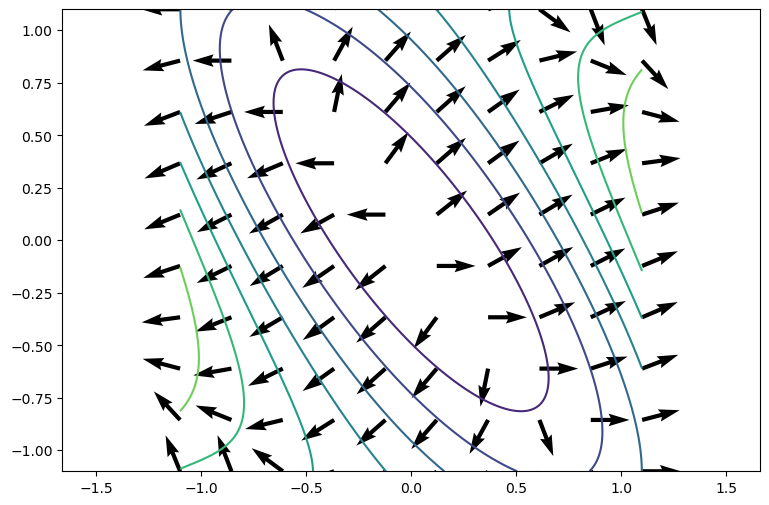

In [6]:
def draw_vector_field_2(F, xmin, xmax, ymin, ymax, N=15):
    X = np.linspace(xmin, xmax, N)  
    Y = np.linspace(ymin, ymax, N)
    U, V = F(*np.meshgrid(X, Y))  # Champ de vecteur
    M = np.hypot(U, V)  # Normes des (U[i],V[i])
    M[M == 0] = 1  # évite la division par 0
    U /= M  # normalisation de U
    V /= M  # .... et de V
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines_2(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 

f = lambda x, y : np.cosh(x)+ np.sin(x + y)**2
df = lambda x, y : np.array([np.sinh(x) 
                             + 2*np.cos(x + y)*np.sin(x + y),
                             2*np.cos(x + y)*np.sin(x + y)])
%matplotlib inline
plt.figure(figsize=(9,6))
level_lines_2(f, -1.1, 1.1, -1.1, 1.1, np.linspace(1, 3, 10))
draw_vector_field_2(df, -1.1, 1.1, -1.1, 1.1, 10)
plt.axis('equal')
plt.show()

In [7]:
# Définition de f et df (i.e. : f')
f = lambda x, y : np.cosh(x)+ np.sin(x + y)**2
df = lambda x, y : np.array([np.sinh(x) + 2*np.cos(x + y)*np.sin(x + y), 2*np.cos(x + y)*np.sin(x + y)])

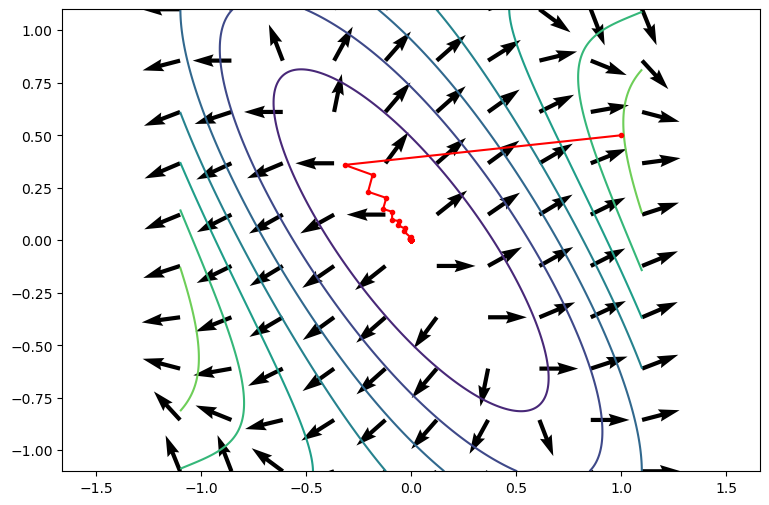

In [8]:

c=0.5
b=0.75
alpha=1
z0=np.array([1,0.5])
nmax=50
iter=0
z=z0
z_list=[z]
while iter<nmax:
    t=alpha
    d=-df(z[0],z[1])
    k=0
    while f(z[0]+t*d[0],z[1]+t*d[1])>f(z[0],z[1])-c*t*np.dot(d,d):
        t=alpha*b**k
        k=k+1
    z=z+d*t
    
    alpha=alpha/b
    iter=iter+1
    z_list.append(z)



%matplotlib inline
plt.figure(figsize=(9,6))
level_lines_2(f, -1.1, 1.1, -1.1, 1.1, np.linspace(1, 3, 10))
draw_vector_field_2(df, -1.1, 1.1, -1.1, 1.1, 10)
plt.axis('equal')
plt.plot([z[0] for z in z_list], [z[1] for z in z_list], 'r.-')
plt.show()

On considère maintenant la fonction définie sur $\mathbb{R}^3$ par 
$$
f(x,y,z):= \cosh(x) + \sin^2(x+y) + (y-z)^2,\qquad \text{pour }w=(x,y,z)\in \mathbb{R}^3.
$$

**Question 14.** Appliquez la méthode d'optimisation ci-dessus à cette fonction, en commençant par $w^0=(1,0.5,1)$ (avec toujours $c=0.5$, $\beta=0.75$ et $\alpha=1$ à la première itération). 

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_22072\969775919.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())  # Define the 3D plot


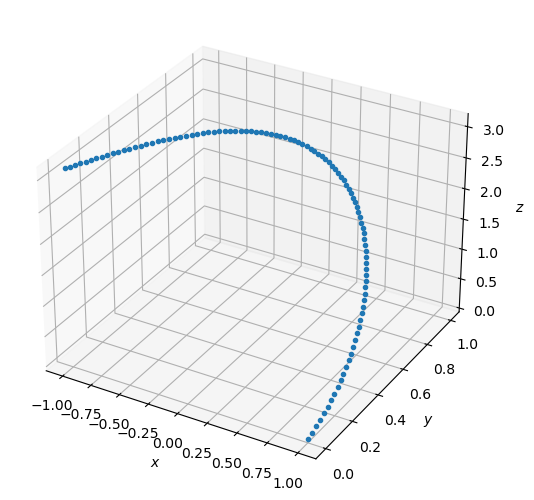

In [9]:
# Pour les plots en 3 dimensions
from mpl_toolkits.mplot3d import Axes3D

# exemple
t = np.linspace(0,np.pi,101)
x, y, z = np.cos(t), np.sin(t), t+.5*np.sin(t)**2

ax = Axes3D(plt.figure())  # Define the 3D plot
ax.set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')
ax.plot(x, y, z,'.')  # Plot of the trajectory
plt.show()

In [10]:
# Définition de f et df (i.e. : f')
f = lambda w : np.cosh(
    w[0])+ np.sin(w[0] + w[1])**2 + (w[1] - w[2])**2
df = lambda w : np.array(
    [np.sinh(w[0]) + 2*np.cos(w[0] + w[1])*np.sin(w[0] + w[1]), 
     2*np.cos(w[0] + w[1])*np.sin(w[0] + w[1]) + 2*(w[1] - w[2]), 
     2*(w[2] - w[1])])

C:\Users\NICOLAS\AppData\Local\Temp\ipykernel_22072\4164831767.py:26: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(plt.figure())  # Define the 3D plot


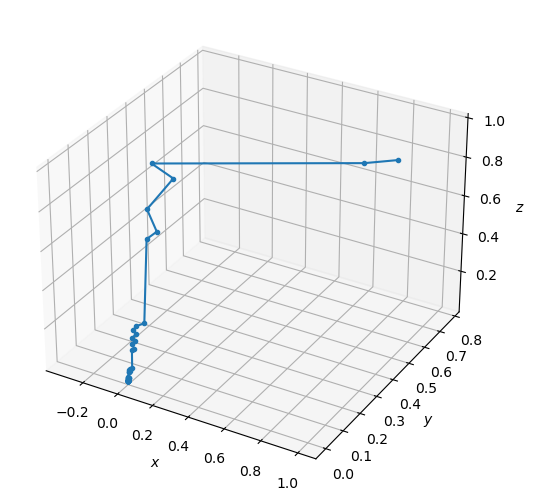

In [11]:

c=0.5
b=0.75
alpha=1
z0=np.array([1,0.5,1])
nmax=50
iter=0
z=z0
z_list=[z]
while iter<nmax:
    t=alpha
    d=-df(z)
    k=0
    while f(z+t*d)>f(z)-c*t*np.dot(d,d):
        t=alpha*b**k
        k=k+1
    z=z+d*t
    
    alpha=alpha/b
    iter=iter+1
    z_list.append(z)




#plot z_list beware it is in 3D
ax = Axes3D(plt.figure())  # Define the 3D plot
ax.set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')
ax.plot([z[0] for z in z_list], [z[1] for z in z_list], [z[2] for z in z_list],'.-')  # Plot of the trajectory
plt.show()